C:\Users\hp\AppData\Local\Temp\ipykernel_17076\3053660384.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=dt1.corr()


Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64


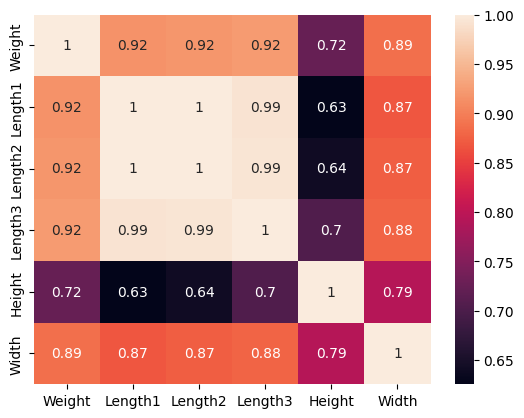

  Species  Weight   Height   Width
0   Bream   242.0  11.5200  4.0200
1   Bream   290.0  12.4800  4.3056
2   Bream   340.0  12.3778  4.6961
3   Bream   363.0  12.7300  4.4555
4   Bream   430.0  12.4440  5.1340
R squared error:  0.7784675103050082
Mean squared error:  42168.8528016437
Mean absolute error:  114.38323922525834


C:\Users\hp\AppData\Local\Temp\ipykernel_17076\3053660384.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 0]= labelencoder_x.fit_transform(x.iloc[:,0])


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  


dt1 = pd.read_csv(r"Fish.csv")


cor=dt1.corr()
print(cor['Weight'])
sns.heatmap(cor,annot =True)
plt.show()

dt=dt1.drop(['Length1', 'Length2', 'Length3'], axis =1)
print(dt.head())
y=dt['Weight']


x=dt.drop(columns='Weight')

labelencoder_x= LabelEncoder()  

x.iloc[:, 0]= labelencoder_x.fit_transform(x.iloc[:,0])  


lin_model=LinearRegression()

poly_regs= PolynomialFeatures(degree= 2)

x_poly= poly_regs.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)


lin_model.fit(x_train,y_train)

y_pred=lin_model.predict(x_test)

print("R squared error: ", metrics.r2_score(y_test,y_pred))

print("Mean squared error: ", metrics.mean_squared_error(y_test,y_pred))

print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_pred))
